# JD.com dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

/Users/tianlei/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


# Part 1: Data Exploration

In [2]:
order = pd.read_csv('/Users/tianlei/Desktop/Masters/Capstone/capstone_jd_msom_data/JD_order_data.csv')
order.head()

,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type,promise,original_unit_price,final_unit_price,direct_discount_per_unit,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des
0,d0cf5cc6db,0abe9ef2ce,581d5b54c1,2018-03-01,2018-03-01 17:14:25.0,1,2,-,89.0,79.0,0.0,10.0,0.0,0.0,0,4,28
1,7444318d01,33a9e56257,067b673f2b,2018-03-01,2018-03-01 11:10:40.0,1,1,2,99.9,53.9,5.0,41.0,0.0,0.0,0,28,28
2,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26.0,1,1,2,78.0,58.5,19.5,0.0,0.0,0.0,0,28,28
3,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50.0,1,1,2,61.0,35.0,0.0,26.0,0.0,0.0,0,4,28
4,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,2018-03-01 19:13:37.0,1,1,1,78.0,53.0,19.0,0.0,0.0,6.0,0,3,16


In [3]:
sku = pd.read_csv('/Users/tianlei/Desktop/Masters/Capstone/capstone_jd_msom_data/JD_sku_data.csv')
sku.head()

,sku_ID,type,brand_ID,attribute1,attribute2,activate_date,deactivate_date
0,a234e08c57,1,c3ab4bf4d9,3.0,60.0,NaN,NaN
1,6449e1fd87,1,1d8b4b4c63,2.0,50.0,NaN,NaN
2,09b70fcd83,2,eb7d2a675a,3.0,70.0,NaN,NaN
3,acad9fed04,2,9b0d3a5fc6,3.0,70.0,NaN,NaN
4,2fa77e3b4d,2,b681299668,-,-,NaN,NaN


In [ ]:
type, promise, original unite price, gift_item, brand_id, attribute1 attribute2, dc_des

In [13]:
# merge order table and sku table
order_sku = pd.merge(order, sku, how = 'left', left_on = 'sku_ID', right_on = 'sku_ID')
order_sku.columns

Index(['order_ID', 'user_ID', 'sku_ID', 'order_date', 'order_time', 'quantity',
       'type_x', 'promise', 'original_unit_price', 'final_unit_price',
       'direct_discount_per_unit', 'quantity_discount_per_unit',
       'bundle_discount_per_unit', 'coupon_discount_per_unit', 'gift_item',
       'dc_ori', 'dc_des', 'type_y', 'brand_ID', 'attribute1', 'attribute2',
       'activate_date', 'deactivate_date'],
      dtype='object')

In [43]:
# convert column types
order_sku['order_date'] = order_sku['order_date'].apply(pd.to_datetime)

([<matplotlib.axis.XTick at 0x7f981653ea58>,
 [Text(0.0, 0, '1'),
  Text(1.0, 0, '2'),
  Text(2.0, 0, '3'),
  Text(3.0, 0, '4'),
  Text(4.0, 0, '5'),
  Text(5.0, 0, '6'),
  Text(6.0, 0, '7'),
  Text(7.0, 0, '8'),
  Text(8.0, 0, '9'),
  Text(9.0, 0, '10'),
  Text(10.0, 0, '11'),
  Text(11.0, 0, '12'),
  Text(12.0, 0, '13'),
  Text(13.0, 0, '14'),
  Text(14.0, 0, '15'),
  Text(15.0, 0, '16'),
  Text(16.0, 0, '17'),
  Text(17.0, 0, '18'),
  Text(18.0, 0, '19'),
  Text(19.0, 0, '20'),
  Text(20.0, 0, '21'),
  Text(21.0, 0, '22'),
  Text(22.0, 0, '23'),
  Text(23.0, 0, '24'),
  Text(24.0, 0, '25'),
  Text(25.0, 0, '26'),
  Text(26.0, 0, '27'),
  Text(27.0, 0, '28'),
  Text(28.0, 0, '29'),
  Text(29.0, 0, '30'),
  Text(30.0, 0, '31')])

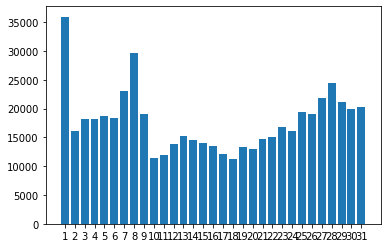

In [49]:
# 
sku_count_perday = order[['sku_ID','order_date']].groupby(['order_date']).count()
plt.bar(x = sku_count_perday.index, height = sku_count_perday.unstack().values )
plt.xticks(sku_count_perday.index, range(1,32))

In [7]:
order_sku[['sku_ID','brand_ID','dc_des']].nunique()

sku_ID      9159
brand_ID    1063
dc_des        60
dtype: int64

In [9]:
order_sku[['sku_ID','brand_ID','dc_des','order_date']].groupby(['order_date','dc_des']).nunique().mean()

sku_ID      137.679032
brand_ID     63.226344
dtype: float64

In [10]:
order_sku[['sku_ID','brand_ID','dc_des','order_date']].groupby([pd.Grouper(key = 'order_date',freq = 'W-MON')]).nunique().mean()

sku_ID      4547.0
brand_ID     728.4
dc_des        60.0
dtype: float64

In [11]:
sku_set = set(order_sku['sku_ID'])
date_set = set(order_sku['order_date'])
dc_des_set = set(order_sku['dc_des'])

# Part 2 Data Cleaning

In [137]:
order_sku['final_unit_price'].describe()

count    549989.000000
mean         71.572599
std          75.879057
min         -32.000000
25%          33.000000
50%          58.000000
75%          95.000000
max       12158.000000
Name: final_unit_price, dtype: float64

In [138]:
order_sku['original_unit_price'].describe()

count    549989.000000
mean        102.813542
std          95.035563
min           0.000000
25%          59.000000
50%          79.000000
75%         139.000000
max       12158.000000
Name: original_unit_price, dtype: float64

In [124]:
order_sku.loc[order_sku['final_unit_price']<0,['final_unit_price','original_unit_price']]

,final_unit_price,original_unit_price
101,-1.333333,0.0
114,-1.333333,0.0
116,-0.500000,0.0
117,-0.500000,0.0
147,-0.500000,0.0
...,...,...
549761,-1.000000,0.0
549904,-14.000000,0.0
549980,-3.000000,0.0
549983,-1.000000,0.0


In [139]:
sum(order_sku['original_unit_price']==0)/len(order_sku)

0.1720034400688014

In [125]:
sum(order_sku['final_unit_price']<0)/len(order_sku)

0.015522128624390669

1.56% rows has missing price values

In [135]:
sum(order_sku[['sku_ID','original_unit_price']].groupby(['sku_ID']).min().unstack() ==0)

485

In [136]:
sum(order_sku[['sku_ID','original_unit_price']].groupby(['sku_ID']).max().unstack() ==0)

345

485 skus has min original price = 0

345 skus has max original price = 0

# Part 2 Feature Engineering

In [53]:
# convert 'order_date' to 'day_of_month'
order_sku['day_of_month'] = [x.strftime('%d') for x in order_sku['order_date']]

Text(0.5, 1.0, 'hour of order')

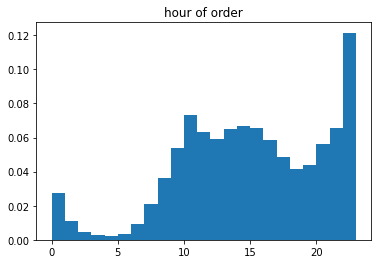

In [88]:
# leave only the hour in 'order_time'
order_sku['order_time'] = order_sku['order_time'].apply(pd.to_datetime)
order_sku['order_hour'] = [int(x.strftime('%H')) for x in order_sku['order_time']]

# plot
plt.hist(order_sku['order_hour'],bins = range(0,24),density = True)
plt.title('hour of order')

In [89]:
# divide 'order_hour' into 10 bins (reduce 24 categories into 10)
bins = np.percentile(order_sku['order_hour'], range(0,101,10))
order_sku['order_hour'] = pd.cut(order_sku['order_hour'], bins)

# convert bins to dummies?
#hour_d = pd.get_dummies(order_sku['order_hour']).astype(np.int64)
#order_sku = pd.concat([order_sku, hour_d], axis = 1).drop('order_hour', axis = 1)

In [98]:
# add discount rate feature
1 - (order_sku['final_unit_price']/order_sku['original_unit_price'])
        
#order_sku['discount_rate'] = discount

0         0.112360
1         0.460460
2         0.250000
3         0.426230
4         0.320513
            ...   
549984         inf
549985    0.533898
549986    0.000000
549987    0.587302
549988    0.279412
Length: 549989, dtype: float64